## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.utils.data import DataLoader,TensorDataset
from torch.utils.data import random_split

In [0]:
df=pd.read_csv('https://raw.githubusercontent.com/soumyajit4419/Wine_Quality_Classification/master/winequality.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.shape

(1599, 12)

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Getting Input and Target Columns values

In [0]:
inputs=df.drop('quality',axis=1)

In [9]:
inputs=inputs.values
inputs

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [0]:
targets=df[['quality']]

In [32]:
targets=targets.values
targets

array([[5],
       [5],
       [5],
       ...,
       [6],
       [5],
       [6]])

## Converting The Values to pytorch tensor

In [0]:
py_inputs=torch.tensor(inputs, dtype=torch.float32)
py_target=torch.tensor(targets)

In [13]:
print(py_inputs)
print(py_target)

tensor([[ 7.4000,  0.7000,  0.0000,  ...,  3.5100,  0.5600,  9.4000],
        [ 7.8000,  0.8800,  0.0000,  ...,  3.2000,  0.6800,  9.8000],
        [ 7.8000,  0.7600,  0.0400,  ...,  3.2600,  0.6500,  9.8000],
        ...,
        [ 6.3000,  0.5100,  0.1300,  ...,  3.4200,  0.7500, 11.0000],
        [ 5.9000,  0.6450,  0.1200,  ...,  3.5700,  0.7100, 10.2000],
        [ 6.0000,  0.3100,  0.4700,  ...,  3.3900,  0.6600, 11.0000]])
tensor([[5],
        [5],
        [5],
        ...,
        [6],
        [5],
        [6]])


In [14]:
print(py_inputs.shape)

torch.Size([1599, 11])


## Pytorch Dataset and Dataloader

In [0]:
dataset=TensorDataset(py_inputs,py_target)

In [0]:
val_percent = 0.1
num_rows=inputs.shape[0]
val_size = int(num_rows * val_percent)
train_size = num_rows - val_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])

In [0]:
batchsize=32

In [0]:
train_loader = DataLoader(train_ds,batch_size=batchsize,shuffle=True)
val_loader = DataLoader(val_ds,batch_size=batchsize)

In [19]:
for xb,yb in train_loader:
  print("inputs",xb)
  print("outputs",yb)
  break

inputs tensor([[7.8000e+00, 3.4000e-01, 3.7000e-01, 2.0000e+00, 8.2000e-02, 2.4000e+01,
         5.8000e+01, 9.9640e-01, 3.3400e+00, 5.9000e-01, 9.4000e+00],
        [6.3000e+00, 3.0000e-01, 4.8000e-01, 1.8000e+00, 6.9000e-02, 1.8000e+01,
         6.1000e+01, 9.9590e-01, 3.4400e+00, 7.8000e-01, 1.0300e+01],
        [7.9000e+00, 5.7000e-01, 3.1000e-01, 2.0000e+00, 7.9000e-02, 1.0000e+01,
         7.9000e+01, 9.9677e-01, 3.2900e+00, 6.9000e-01, 9.5000e+00],
        [9.0000e+00, 4.0000e-01, 4.1000e-01, 2.0000e+00, 5.8000e-02, 1.5000e+01,
         4.0000e+01, 9.9414e-01, 3.2200e+00, 6.0000e-01, 1.2200e+01],
        [7.4000e+00, 6.0000e-01, 2.6000e-01, 7.3000e+00, 7.0000e-02, 3.6000e+01,
         1.2100e+02, 9.9820e-01, 3.3700e+00, 4.9000e-01, 9.4000e+00],
        [8.9000e+00, 1.2000e-01, 4.5000e-01, 1.8000e+00, 7.5000e-02, 1.0000e+01,
         2.1000e+01, 9.9552e-01, 3.4100e+00, 7.6000e-01, 1.1900e+01],
        [7.1000e+00, 4.6000e-01, 1.4000e-01, 2.8000e+00, 7.6000e-02, 1.5000e+01,
      

## Building A model

In [0]:
input_size = 11
output_size = 1 

In [0]:
class Wine_Quality(nn.Module):

  def __init__(self):
     super().__init__()
     self.linear = nn.Linear(input_size, output_size)

  def forward(self,xb):
    out = self.linear(xb)
    return out

  def training_step(self,batch):
    inputs,target = batch
    out=self(inputs)
    loss = F.l1_loss(out,target)
    return loss

  def validation_step(self,batch):
    inputs,target = batch
    out = self(inputs)
    loss = F.l1_loss(out,target)
    return {'val_loss': loss.detach()}

  def validation_epoch_end(self,outputs):
    batch_losses = [out['val_loss'] for out in outputs]
    epoch_loss = torch.stack(batch_losses).mean()
    return {'val_loss': epoch_loss.item()}

  def epoch_end(self, epoch, result):
    print("Epoch [{}], val_loss: {:.4f}".format(epoch, result['val_loss']))

In [0]:
model = Wine_Quality()

## Training and Evaluation

In [0]:
def evaluate(model,val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

In [0]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [25]:
history = fit(10,1e-4, model, train_loader, val_loader)

Epoch [0], val_loss: 5.7212
Epoch [1], val_loss: 3.0375
Epoch [2], val_loss: 2.7132
Epoch [3], val_loss: 2.4260
Epoch [4], val_loss: 2.1597
Epoch [5], val_loss: 1.8899
Epoch [6], val_loss: 1.6367
Epoch [7], val_loss: 1.4067
Epoch [8], val_loss: 1.1773
Epoch [9], val_loss: 0.9660


In [26]:
history1 = fit(10,1e-4, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8141
Epoch [1], val_loss: 0.7096
Epoch [2], val_loss: 0.6367
Epoch [3], val_loss: 0.6143
Epoch [4], val_loss: 0.6036
Epoch [5], val_loss: 0.5996
Epoch [6], val_loss: 0.5966
Epoch [7], val_loss: 0.5953
Epoch [8], val_loss: 0.5941
Epoch [9], val_loss: 0.5963


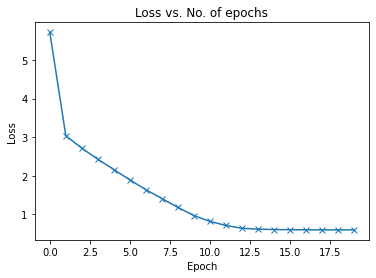

In [28]:
accuracies = [r['val_loss'] for r in history+history1]
plt.plot(accuracies, '-x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. No. of epochs');

In [29]:
val_loss = evaluate(model,val_loader)
val_loss

{'val_loss': 0.5963369011878967}

## Prediction

In [0]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(inputs)          
    prediction = predictions[0].detach()
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)

In [55]:
input,target=val_ds[0]
predict_single(input, target, model)

Input: tensor([ 9.0000,  0.5800,  0.2500,  2.0000,  0.1040,  8.0000, 21.0000,  0.9977,
         3.2700,  0.7200,  9.6000])
Target: tensor([5])
Prediction: tensor([5.3161])


## Saving a pytorch model

In [0]:
torch.save(model.state_dict(), 'wine_quality.pth')